<a id='Title-Intermediate-ConvNet'></a>
<h1 style="color:SlateGray;">Intermdiate ConvNet</h1>

**Input dataset**

Kaggle Cats and Dogs:

**Output classification**



<h2 style="color:SlateGray;">Background</h2>

**Layers**

[*Dense*](1_Image_Classification.ipynb#Layers-Dense)

[*Conv2D*](6_Basic_ConvNet.ipynb#Layers-Conv2D)

[*MaxPooling2D*](6_Basic_ConvNet.ipynb#Layers-MaxPooling2D)

[*Flatten*](6_Basic_ConvNet.ipynb#Layers-Flatten)

**Activations**

[*relu*](1_Image_Classification.ipynb#Activations-relu)

[*sigmoid*](2_Binary_Classification.ipynb#Activations-sigmoid)
		
**Optimizers**

[*rmsprop*](1_Image_Classification.ipynb#Optimizers-rmsprop)
		
**Loss functions**

[*binary_crossentropy*](2_Binary_Classification.ipynb#Loss-functions-binary_crossentropy)

<h2 style="color:SlateGray;">Overview</h2>

Explore built-in image prepocessing classes.


In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.2'

In [3]:
import os, shutil

original_dataset_dir = r'./kaggle_original_data'

base_dir = r'./cats_and_dogs_small'
if not os.path.isdir(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir):
    os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir):
    os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir):
    os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir):
    os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir):
    os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150, 150),
                                                       batch_size=20,
                                                       class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [11]:
from keras import optimizers

model1.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history1 = model1.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=(validation_generator),
                              validation_steps=50)

model1.save('cats_and_dogs_small_1.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [12]:
import matplotlib.pyplot as plt

acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Epoch 1/30
100/100 [==============================] - 12s 117ms/step - loss: 0.6881 - acc: 0.5690 - val_loss: 0.6982 - val_acc: 0.5170
Epoch 2/30
100/100 [==============================] - 6s 62ms/step - loss: 0.6162 - acc: 0.6685 - val_loss: 0.6144 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 6s 63ms/step - loss: 0.5558 - acc: 0.7125 - val_loss: 0.5845 - val_acc: 0.7030
Epoch 4/30
100/100 [==============================] - 6s 63ms/step - loss: 0.4974 - acc: 0.7620 - val_loss: 0.5945 - val_acc: 0.6810
Epoch 5/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4494 - acc: 0.7900 - val_loss: 0.6650 - val_acc: 0.6460
Epoch 6/30
100/100 [==============================] - 6s 62ms/step - loss: 0.4061 - acc: 0.8150 - val_loss: 0.5862 - val_acc: 0.7130
Epoch 7/30
100/100 [==============================] - 6s 62ms/step - loss: 0.3678 - acc: 0.8390 - val_loss: 0.6470 - val_acc: 0.6880
Epoch 8/30
100/100 [==============================] - 6s 64ms/step 

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model1.summary()

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
history2 = model2.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

model2.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 22s 222ms/step - loss: 0.6930 - acc: 0.5203 - val_loss: 0.7077 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 19s 193ms/step - loss: 0.6767 - acc: 0.5678 - val_loss: 0.6584 - val_acc: 0.5860
Epoch 3/30
100/100 [==============================] - 21s 214ms/step - loss: 0.6607 - acc: 0.6028 - val_loss: 0.6791 - val_acc: 0.5760
Epoch 4/30
100/100 [==============================] - 19s 186ms/step - loss: 0.6493 - acc: 0.6166 - val_loss: 0.6139 - val_acc: 0.6410
Epoch 5/30
100/100 [==============================] - 20s 199ms/step - loss: 0.6264 - acc: 0.6619 - val_loss: 0.8280 - val_acc: 0.5430
Epoch 6/30
100/100 [==============================] - 22s 218ms/step - loss: 0.6114 - acc: 0.6666 - val_loss: 0.5988 - val_acc: 0.6580
Epoch 7/30
100/100 [==============================] - 21s 206ms/step - loss: 0.5987 - acc: 0.6763 - val_lo

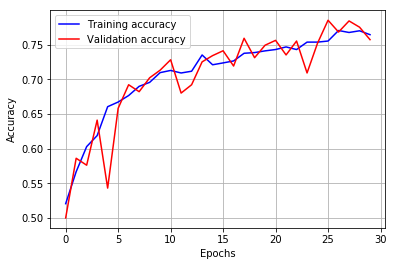

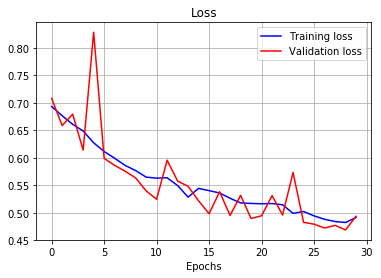

In [23]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.title('Loss')
plt.legend()
plt.grid()

plt.show()